In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(r"C:\Users\ASHA\Downloads\library_usage_data.csv")


In [6]:
# Convert date columns
df["Borrow_Date"] = pd.to_datetime(df["Borrow_Date"])
df["Return_Date"] = pd.to_datetime(df["Return_Date"])

In [7]:
# Borrowing duration
df["Borrow_Duration_Days"] = (df["Return_Date"] - df["Borrow_Date"]).dt.days

In [8]:
# Extract weekday and month
df["Borrow_Weekday"] = df["Borrow_Date"].dt.day_name()
df["Borrow_Month"] = df["Borrow_Date"].dt.to_period("M").astype(str)

In [9]:
# Summary 1: Member type statistics
member_summary = df.groupby("Member_Type")["Borrow_Duration_Days"].agg(["mean", "median", "count"]).reset_index()
print("📌 Member Type Summary:\n", member_summary)

📌 Member Type Summary:
   Member_Type       mean  median  count
0     Faculty  14.787546    15.0    273
1      Public  15.006849    14.0    292
2  Researcher  14.949153    15.0    236
3     Student  14.844221    15.0    199


In [10]:
# Summary 2: Most borrowed book categories
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "Borrow_Count"]
print("\n📚 Most Borrowed Categories:\n", category_counts)



📚 Most Borrowed Categories:
      Category  Borrow_Count
0     Science           244
1     History           201
2   Education           172
3  Literature           169
4         Art           116
5  Technology            98


In [11]:
# Summary 3: Borrowing trend over time
monthly_borrow = df.groupby("Borrow_Month").size().reset_index(name="Transactions")
print("\n📈 Monthly Borrow Trend:\n", monthly_borrow)


📈 Monthly Borrow Trend:
    Borrow_Month  Transactions
0       2022-01            33
1       2022-02            29
2       2022-03            42
3       2022-04            39
4       2022-05            41
5       2022-06            41
6       2022-07            43
7       2022-08            51
8       2022-09            42
9       2022-10            38
10      2022-11            25
11      2022-12            35
12      2023-01            42
13      2023-02            41
14      2023-03            45
15      2023-04            44
16      2023-05            40
17      2023-06            43
18      2023-07            46
19      2023-08            48
20      2023-09            57
21      2023-10            58
22      2023-11            40
23      2023-12            37


In [12]:
# Summary 4: Borrowing by weekday
weekday_borrow = df["Borrow_Weekday"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).fillna(0).reset_index()
weekday_borrow.columns = ["Weekday", "Transactions"]

In [13]:
# Set plot style
sns.set(style="whitegrid")

C:\Users\ASHA\AppData\Local\Temp\ipykernel_16168\1897189939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, y="Category", x="Borrow_Count", palette="crest")


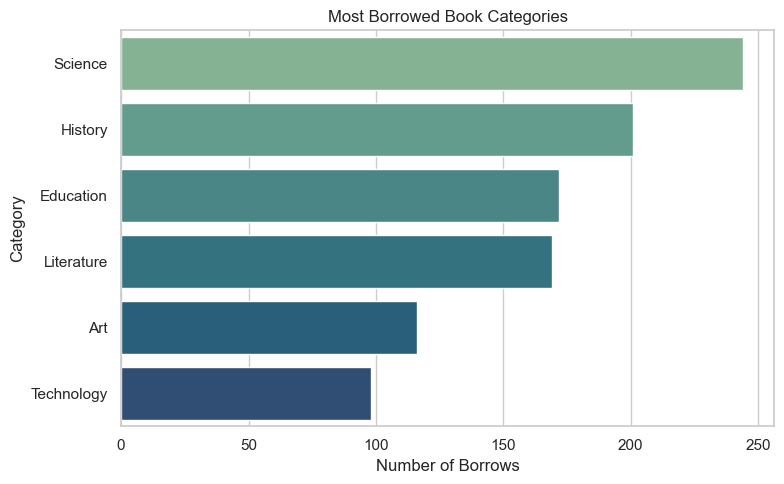

In [14]:
# Plot 1: Borrowing by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=category_counts, y="Category", x="Borrow_Count", palette="crest")
plt.title("Most Borrowed Book Categories")
plt.xlabel("Number of Borrows")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig("category_borrow_plot.png")
plt.show()


C:\Users\ASHA\AppData\Local\Temp\ipykernel_16168\747340594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_borrow, x="Weekday", y="Transactions", palette="mako")


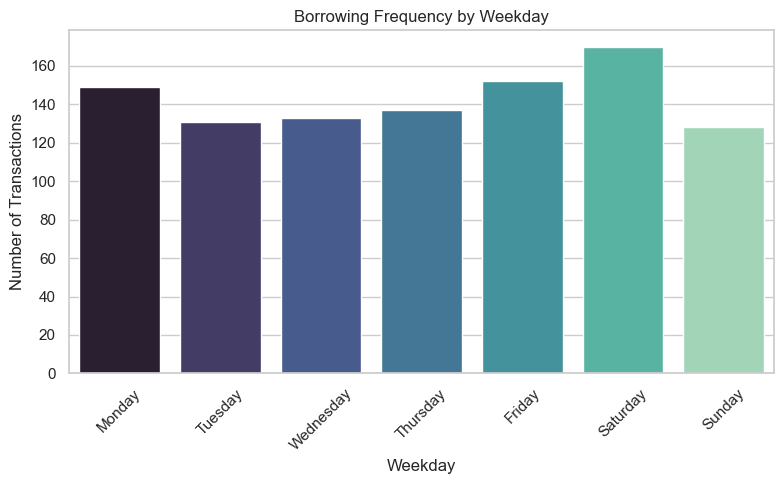

In [15]:
# Plot 2: Borrowing by Weekday
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_borrow, x="Weekday", y="Transactions", palette="mako")
plt.title("Borrowing Frequency by Weekday")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("weekday_borrow_plot.png")
plt.show()

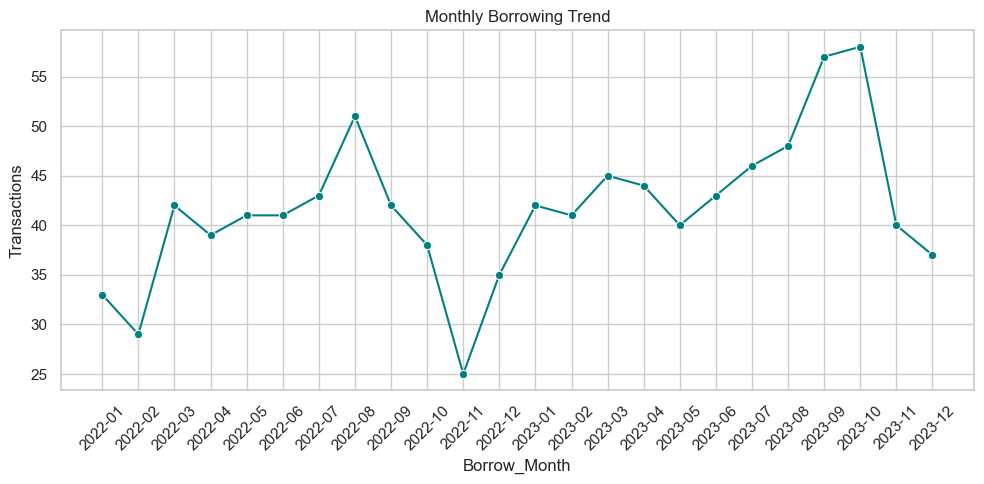

In [16]:
# Plot 3: Monthly Borrowing Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_borrow, x="Borrow_Month", y="Transactions", marker="o", color="teal")
plt.title("Monthly Borrowing Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_borrow_plot.png")
plt.show()